In [1]:
import sys
import os

import matplotlib.pyplot as plt

# Meus scripts
sys.path.append(os.path.abspath('../Scripts'))
import data_processing_WAGGS
import starlight_analysis_WAGGS as sl_analysis

In [2]:
files = {
    "U" : "../../Dados/WAGGS_DR1/norm_NGC0104_U7000_2015-01-30.fits",
    "B" : "../../Dados/WAGGS_DR1/norm_NGC0104_B7000_2015-01-30.fits",
    "R" : "../../Dados/WAGGS_DR1/norm_NGC0104_R7000_2015-01-30.fits",
    "I" : "../../Dados/WAGGS_DR1/norm_NGC0104_I7000_2015-01-30.fits"
}

# Idade: 4170 - 5540
# Metalicidade: 5280-7020 ou 4828 - 5364
# Av: 3540 - 7410
# Total: 3450 - 9000

err_s = 0.01
target = "NGC0104"

l_ambda, fluxo, erro = data_processing_WAGGS.processar_espectros(files, lambda_min=3200, lambda_max=9100, step=1.0,
                                                                 output_name=f"{target}.in", err_sistematico=err_s)

# Verifica header de um dos arquivos
#fits_file = fits.open("../../Dados/WAGGS_DR1/norm_NGC0104_U7000_2015-01-30.fits")
#print(fits_file[0].header)
#print(fits_file.info())

a floating-point value was expected. [astropy.wcs.wcs]


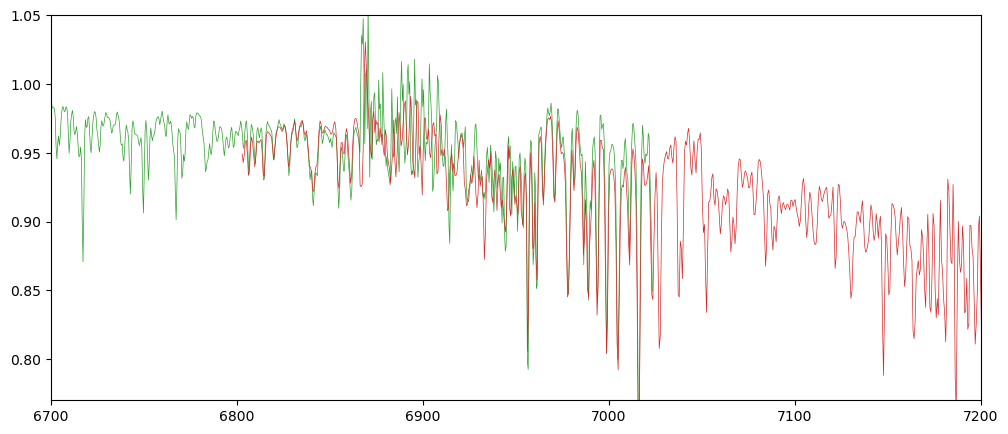

In [3]:
plt.figure(figsize = (12,5))
plt.xlim(6700, 7200)
plt.ylim(0.77, 1.05)
for band in files.keys():
    l, f, e = data_processing_WAGGS.get_data_from_fits(files[band])
    plt.plot(l, f, lw=0.5, label=f'Banda {band}')

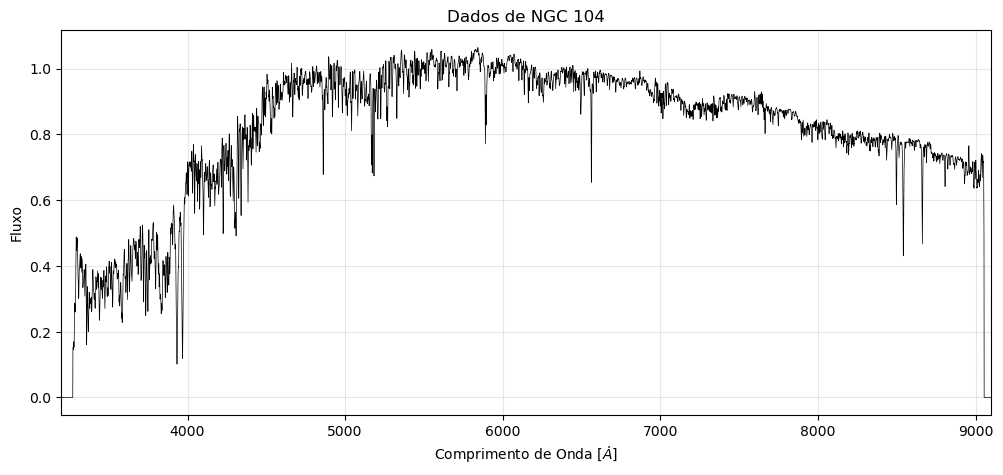

In [4]:
plt.figure(figsize=(12,5))
plt.plot(l_ambda, fluxo, color='black', lw=0.5, label='Espectro NGC 104')
#plt.fill_between(l_ambda, fluxo - erro, fluxo + erro, color='gray', alpha=0.3, label='Erro')
plt.title("Dados de NGC 104")
plt.xlabel("Comprimento de Onda [$\\mathring{A}$]")
plt.ylabel("Fluxo")
plt.xlim(3200, 9100)
plt.grid(True, alpha=0.3)
plt.show()

In [5]:
out_file_path = "NGC0104.out"

sl_obj = sl_analysis.StarlightOutput(out_file_path)

props = sl_obj.calculate_mean_properties()

# Salvar output em txt
filename_out = f"{target}_{sl_obj.min_lambda}-{sl_obj.max_lambda}_{sl_obj.base}_E{err_s * 100:.1f}_A{props['mean_age_mass_gyr']:.1f}.txt"

conteudo = f"""Intervalo do Comprimento de Onda: {sl_obj.min_lambda} - {sl_obj.max_lambda} Å
Erro Sistemático: {err_s * 100:.2f}%
Base Utilizada: {sl_obj.base}

Idade (LUZ):   {props['mean_age_light_gyr']:.2f} Bilhões de Anos
Idade (MASSA): {props['mean_age_mass_gyr']:.2f} Bilhões de Anos
Metalicidade: {props['mean_Z_mass']:.4f}

Chi2/N_eff: {sl_obj.chi2}
Desvio Médio (Adev): {sl_obj.adev}%
Extinção (Av): {sl_obj.av} mag
Percentual de pontos clipados: {(sl_obj.nclip / sl_obj.n0) * 100:.2f}%
"""

print(conteudo)

with open(filename_out, "w") as file:
      file.write(conteudo)

Intervalo do Comprimento de Onda: 4828.0 - 5364.0 Å
Erro Sistemático: 1.00%
Base Utilizada: Base.BC03.S

Idade (LUZ):   11.47 Bilhões de Anos
Idade (MASSA): 12.08 Bilhões de Anos
Metalicidade: 0.0050

Chi2/N_eff: 0.672299
Desvio Médio (Adev): 0.62756%
Extinção (Av): 0.1464 mag
Percentual de pontos clipados: 0.56%



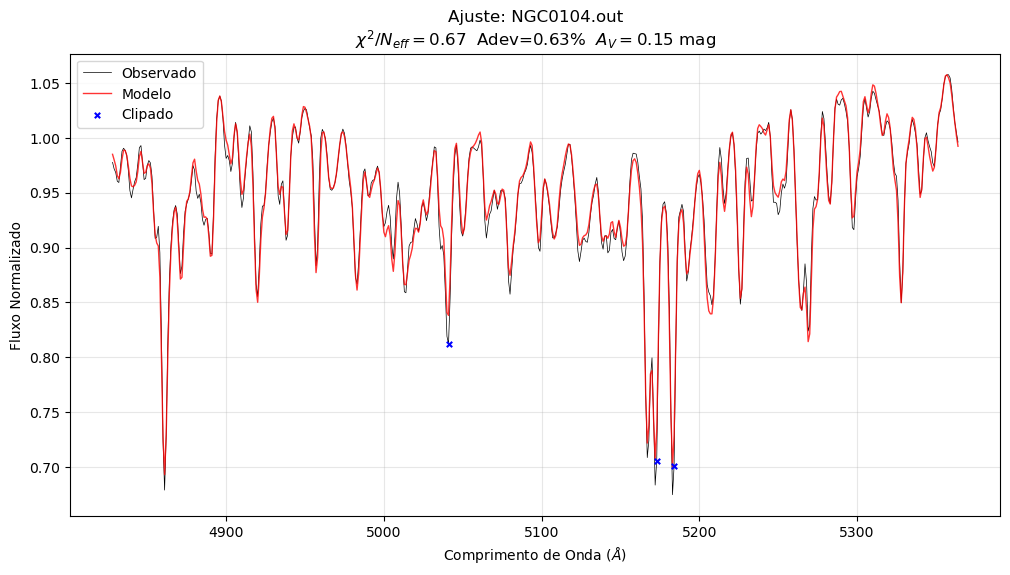

In [6]:
sl_obj.plot_fit()